<a href="https://colab.research.google.com/github/nandanajayachandran/NANDANA_J_ICT_ASSIGNMENTS_CASE_STUDIES/blob/main/Nandana_J_Casestudy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import numpy as np

In [156]:
# Load the dataset
data = pd.read_csv('/content/Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [157]:
#first few rows
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [159]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# **DATA PREPROCESSING**

**NULL VALUES CHECKING**

In [160]:
#Checking for null values
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

**There are no null values in the dataset.**

**OUTLIER DETECTION**

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

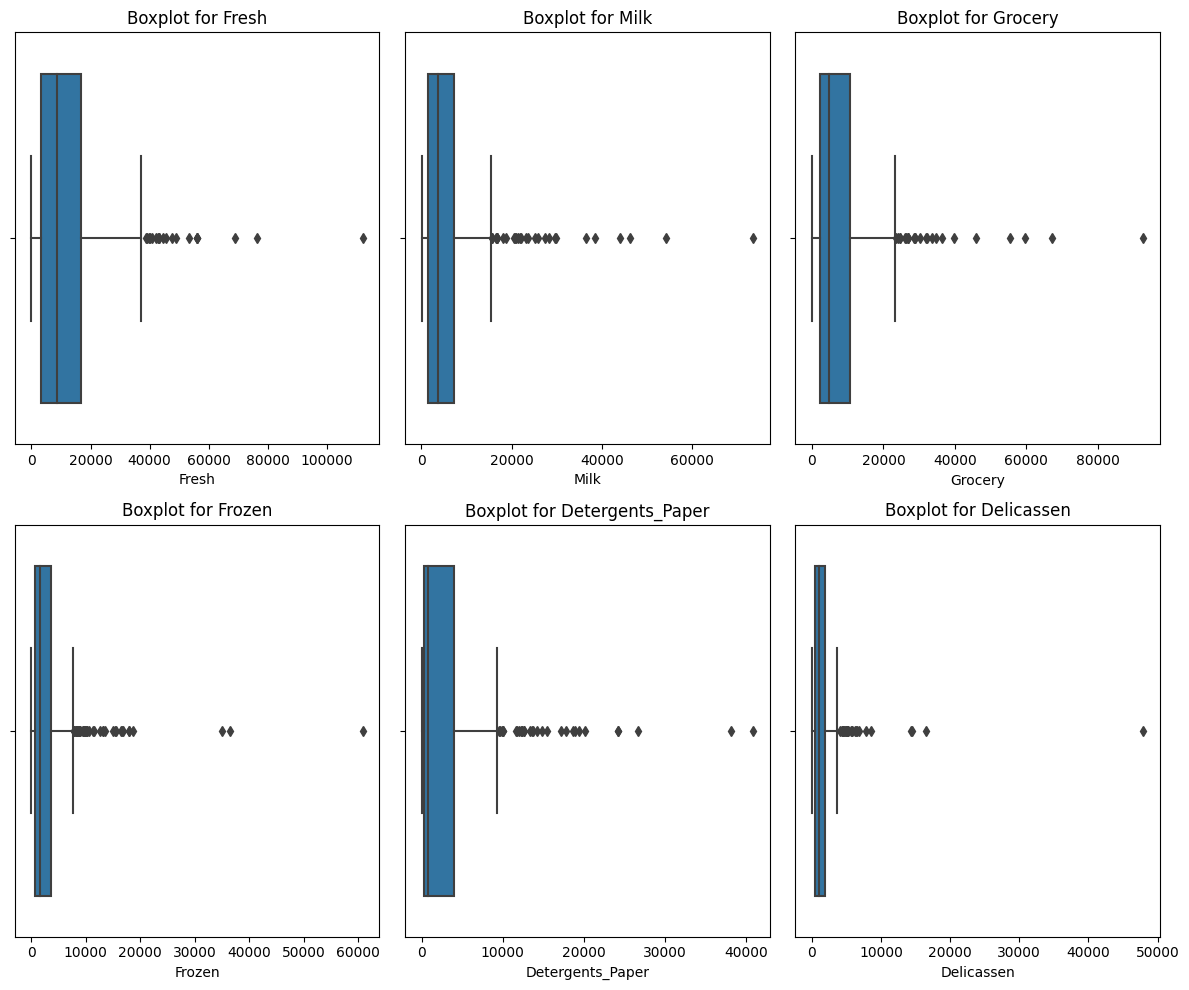

In [162]:
n_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

plt.figure(figsize=(12, 10))

for i, feature in enumerate(n_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()


**There are outliers present in all the numerical features.**

In [163]:
#IQR
iqr = 1.5
df = data.copy()

for feature in n_features:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - iqr* IQR
    upper_bound = Q3 + iqr* IQR

    # Handling outliers by capping
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)

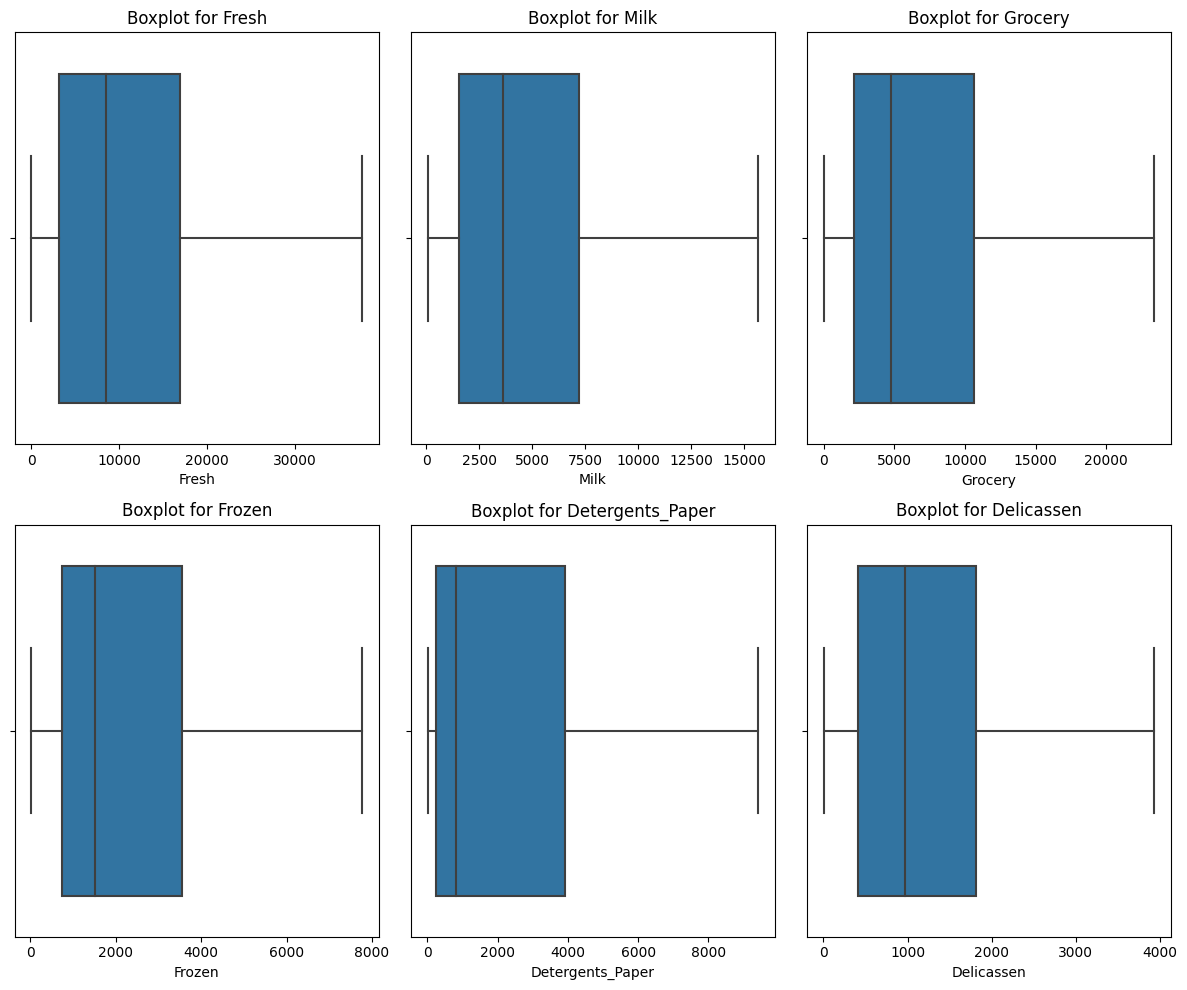

In [164]:
# Plot boxplots after handlin outliers
plt.figure(figsize=(12, 10))
for i, feature in enumerate(n_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
plt.tight_layout()
plt.show()


**Outliers are handled effectively**

# **K-Means Clustering**

In [165]:
from sklearn.cluster import KMeans

In [166]:
# Features for clustering
X = data.drop(['Channel', 'Region'], axis=1)

In [167]:
wcss = []
# Finding inertia
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [168]:
kmeans.inertia_

29734145058.237064

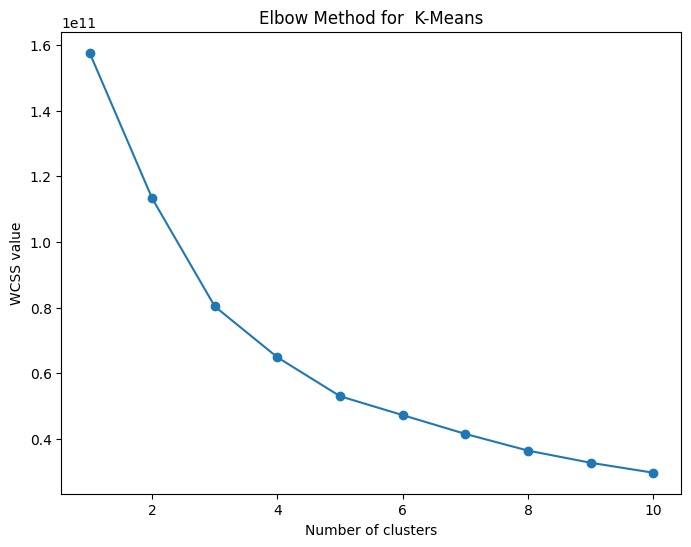

In [169]:
# Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')
plt.title('Elbow Method for  K-Means')
plt.show()

In [170]:
#fitting the K-Means model
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [171]:
# Clustered labels added to the orginal dataset
data['KMeans_Cluster'] = kmeans.labels_

# **Agglomerative Hierarchical Clustering**

In [172]:
from sklearn.cluster import AgglomerativeClustering

In [173]:
X = data.drop(['Channel', 'Region'], axis=1)

In [174]:
#Fitting the Agglomerative Hierarchical Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X)

AgglomerativeClustering(n_clusters=4)

In [175]:
# Clustered labels added to the orginal dataset
data['Agglomerative_Cluster'] = agg_clustering.labels_

In [176]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [177]:
linked = linkage(X , method = "ward")

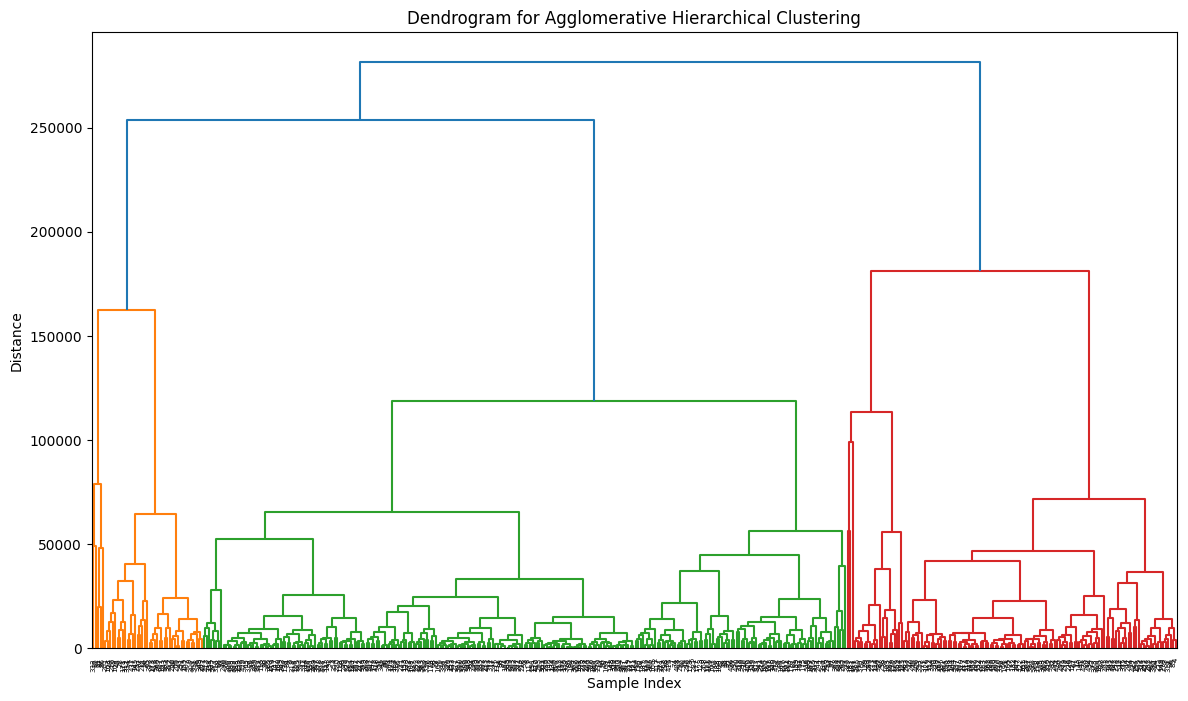

In [178]:
# Plot the dendrogram
plt.figure(figsize=(14, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# **PCA for Dimensionality Reduction**

In [179]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [180]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [181]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [182]:
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
data = pd.concat([data, pca_df], axis=1)

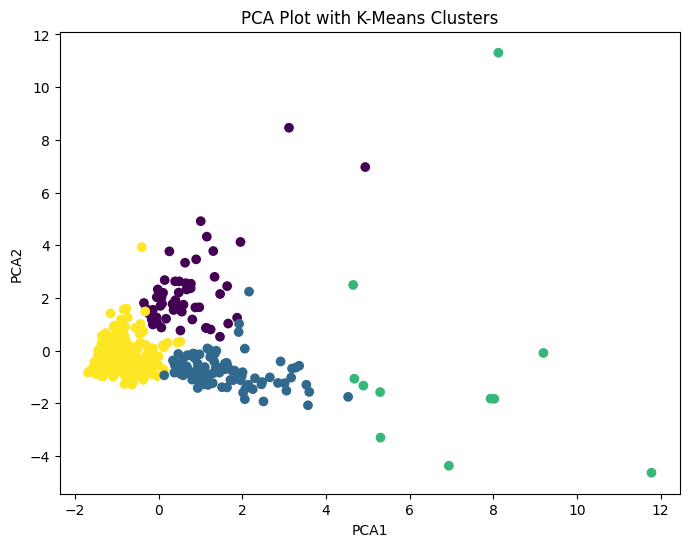

In [183]:
# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['KMeans_Cluster'], cmap='viridis')
plt.title('PCA Plot with K-Means Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [184]:
# Initialize
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

In [185]:
data = pd.concat([data, pca_df], axis=1)

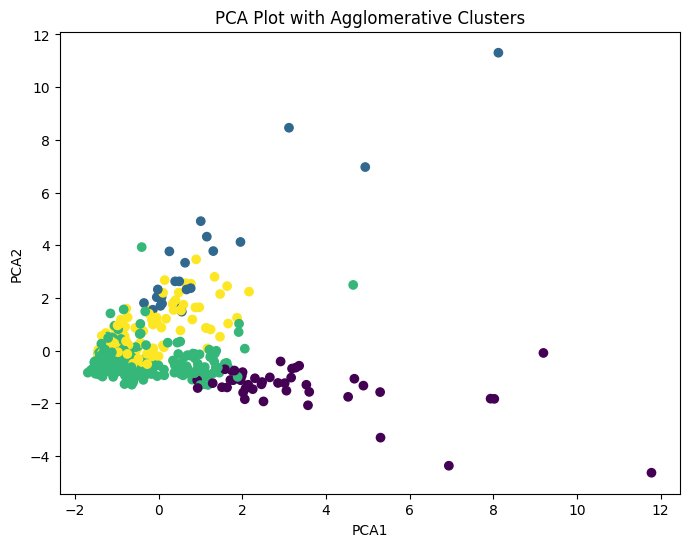

In [186]:
import matplotlib.pyplot as plt

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Agglomerative_Cluster'], cmap='viridis')
plt.title('PCA Plot with Agglomerative Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


With the application of PCA along with the reduction of the features the model efficiency is improved.

Submitted by,
Nandana J.
ML/AI